# Testing a Perceptual Phenomenon
###Project 1

# Introduction

The data that I have observed and analyzed in this project is from a Stroop Effect experiment with 24 participants, each of who were timed while saying out loud the color of each written word in two different lists: a congruent and an incongruent one. The congruent list is composed of color names, where each name is written in the color it represents. The incongruent list is also composed of color names, but none of the names are written in the colors that they represent.

# Variables

The independent variable in this experiment is the given conditions: a congruent list and an incongruent list. The two lists are the same for all participants and do not change.

The dependent variable is the amount of time it takes a participant to say all the colors of the written color names in each list. This variable depends on the individual’s performance and what the task is.

# Hyptheses and Statistical Test

A set of hypotheses that can be made for this experiment includes the null hypothesis, H0, and the alternate hypothesis, HA. The null hypothesis is that the average time it takes participants to vocalize the congruent list will not show any major or unusual differences from the average of time it takes them to vocalize the incongruent list.

The alternate hypothesis is that the average time it takes the participants to say the name of every color they see in the incongruent list is going to be greater than the average time it takes them for the congruent list. This is reasonable, because as they try to determine and say each color in the incongruent list, they’ll have to avoid reading the words, which are the names of other colors. This will require more concentration, so we can simply assume that it will take longer.

H_0:  E[Time_congruent] ≈ E[Time_incongruent]

H_A:  E[Time_congruent] < E[Time_incongruent]

The statistical test that I have planned to use is the dependent samples, one-tailed t-test. This is because each of the samples are dependent and I want to check for H_A, the alternative hypothesis, where the expected value of time taken to say out loud the names of the colors observed in the congruent list is supposed to take less time than the incongruent list.

# Data and Computation

Initializing the Script

In [260]:
import numpy as np
from sympy import *
import pandas as pd
import matplotlib.pyplot as plt
import glob

init_printing();
%matplotlib inline

data = pd.DataFrame()

for f in glob.glob("./stroopdata.csv"):
    DF = pd.read_csv(f)
    data = data.append(DF,ignore_index=True)
    
# We'll need participant numbers for the x-values of the plots.
data['Participants'] = pd.Series(list(range(len(data)))) + 1

The Experiment Data

In [261]:
data

,Congruent,Incongruent,Participants
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5
5,12.238,20.878,6
6,14.692,24.572,7
7,8.987,17.394,8
8,9.401,20.762,9
9,14.480,26.282,10


A Better Look at the Data

In [104]:
data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Sample Size

In [301]:
n = len(data); n                          # n = 24

Expected Value of the Congruent List

In [262]:
Mu_c = data['Congruent'].mean()          # Mu_c = 14.051125

N(Mu_c, 4)

Expected Value of the Incongruent List

In [263]:
Mu_i = data['Incongruent'].mean()        # Mu_i = 22.0159166667

N(Mu_i, 4)

Point Estimate

In [283]:
PE = Mu_i - Mu_c                         # PE = -7.96479166667

N(PE, 3)

Sample Standard Deviation of the Congruent List

In [265]:
S_c = data['Congruent'].std()            # S_c = 3.5593579576451981

N(S_c, 3)

Sample Standard Deviation of the Incongruent List

In [266]:
S_i = data['Incongruent'].std()          # S_i = 4.7970571224691536

N(S_i, 3)

Sample Standard Deviation of the Differences

In [280]:
S = 0
for i in range(n):
    S = S + (((data['Congruent'][i] - data['Incongruent'][i]) - (Mu_c - Mu_i))**2)/(n-1)
    
S = sqrt(S)                              # S = 4.86482691036

N(S, 3)

Sampling Distribution

In [290]:
SD = S/sqrt(n)                           # SD = 0.993028634778

N(SD, 2)

# Plots 

Box Plots

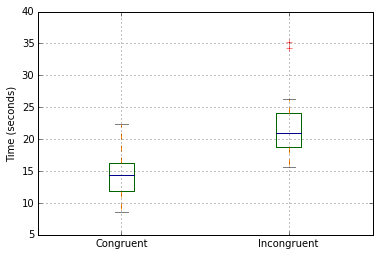

In [297]:
data.plot(x = 'Participants', 
          kind = 'box', 
          sym = 'r+', 
          color = dict(boxes = 'DarkGreen', 
                       whiskers = 'DarkOrange', 
                       medians = 'DarkBlue', 
                       caps = 'Gray')
         ).set_ylabel('Time (seconds)')

The box plots are a great way to see the whole picture, as each, conveniently, shows the min, lower quantile, median, upper quantile, and max of its respective list. It's visually apparent that, overall, the participants took much less time completing the task with the congruent list, than with the incongruent list. You may consider comparing the numbers below to the plots above.

Congruent List: min, lower quantile, median, upper quantile, and max

In [295]:
(data['Congruent'].min(), 
 data['Congruent'].quantile(0), 
 data['Congruent'].quantile(), 
 data['Congruent'].quantile(1), 
 data['Congruent'].max())

Incongruent List: min, lower quantile, median, upper quantile, and max

In [296]:
(data['Incongruent'].min(), 
 data['Incongruent'].quantile(0), 
 data['Incongruent'].quantile(), 
 data['Incongruent'].quantile(1), 
 data['Incongruent'].max())

Bar Plots

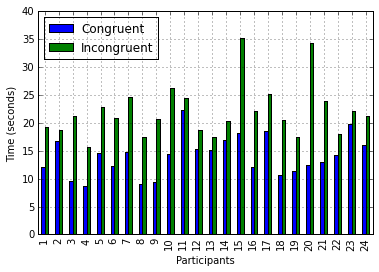

In [209]:
fig, ax = plt.subplots()

data.plot(x = 'Participants', 
          yerr = data_std(), 
          ax = ax, 
          kind = 'bar'
         ).set_ylabel('Time (seconds)')

The bar plots show that every participant performed faster with the congruent list than the incongruent list. This leaves us with no evidence for the case that the incongruent list might take less time to complete. In fact, we can see that most participants took a lot longer to complete the incongruent list compared to their own congruent list trial.

# Results

Where alpha = 0.05, confidence = 90%, and degree of freedom = n - 1 = 23,

t* = t_critical

In [293]:
t_critical = 1.714

t = t_statistic

In [302]:
t = (PE*sqrt(n))/S                       # t = 8.02070694411

N(t, 3)

t > t*

In [294]:
t > t_critical

Where t = 8.02 and DF = 23,

The P value is less than 0.0001

Therefore, P < alpha.

The null hypothesis, H_0, has been rejected, since t_statistical is greater than t_critical (8.02 > 1.714) and the probability value is much less than the significance level. This means that it will most likely take the rest of the population more time to say out loud the names of the colors that they read from the incongruent list than the congruent list.

# Source

Student's t: https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg

P-value calculation: http://graphpad.com/quickcalcs/pValue2/